#**Project: Cleaning [9000+ Movies Dataset]**

#Features of the dataset:
* **Release_Date**: Date when the movie was released.
* **Title**: Name of the movie.
* **Overview**: Brief summary of the movie.
* **Popularity**: It is a very important metric computed by TMDB developers based on the number of views per day, votes per day, number of users marked it as "favorite" and "watchlist" for the data, release date and more other metrics.
* **Vote_Count**: Total votes received from the viewers.
* **Vote_Average**: Average rating based on vote count and the number of viewers out of 10.
* **Original_Language**: Original language of the movies. Dubbed version is not considered to be original language.
* **Genre**: Categories the movie it can be classified as.
* **Poster_Url**: Url of the movie poster.


#Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load Data

In [2]:
#load data and viewing its first 5 rows
df = pd.read_csv("mymoviedb.csv",  lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#Data Wrangling

In [3]:
#Get the number of rows and columns in the dataset
df.shape

(9827, 9)

In [4]:
#Get dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
#Check for missing values
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [6]:
#Check for duplicates
df.duplicated().sum()

0

In [7]:
#Get the statistical summary
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


#Summary after Exploration phase:
> *   The dataset has **9827** rows and **9** columns
*   There is no missing values or duplicated values
* **Release_Date** column has wrong data type, so it has to be casted into **date time** type and leave only the year 
* **Overview** and **Poster_Url** columns are useless during analysis, so we have to drop them











#Data Cleaning 

In [8]:
#drop useless columns
df.drop(columns = ["Overview", "Poster_Url"], inplace = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,en,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


**Release_Date Column**

In [10]:
#Cast the Release_Date Column type into datetime type 
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
print(df["Release_Date"].dtypes)

datetime64[ns]


In [11]:
#Extract the year from Release_Date Column
df['Release_Date'] = pd.DatetimeIndex(df['Release_Date']).year
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,en,Thriller
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


In [12]:
df['Release_Date'].value_counts()

2021    714
2018    530
2017    510
2019    500
2016    470
       ... 
1902      1
1920      1
2024      1
1929      1
1930      1
Name: Release_Date, Length: 102, dtype: int64

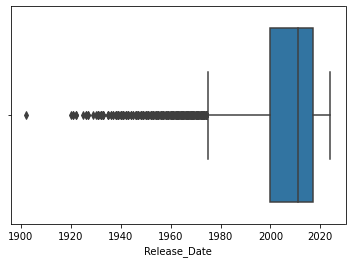

In [13]:
sns.boxplot(data= df, x = "Release_Date" )

**Vote_Average Column**

In [29]:
df["Vote_Average"].unique()

array([ 8.3,  8.1,  6.3,  7.7,  7. ,  6.6,  6.8,  5.3,  7.2,  5.9,  7.3,
        7.1,  5.1,  4.6,  6. ,  8.2,  5.4,  6.1,  8.4,  6.9,  5.8,  7.4,
        7.8,  8. ,  6.2,  6.7,  7.6,  8.6,  4.8,  5.5,  7.9,  6.4,  7.5,
        5.7,  2.2,  6.5,  0. ,  5.6,  5.2,  5. ,  8.5,  3.5,  4. ,  3.3,
        4.7,  4.2,  4.3,  2. ,  4.1,  4.9,  8.7,  4.5,  9.1,  4.4,  3.6,
        2.8,  3.9,  3.8,  9. ,  3. ,  3.1,  3.7,  3.4,  8.9,  2.9,  8.8,
        3.2,  1.5,  9.2,  2.5,  1.8,  2.4,  2.6, 10. ])

**Genre	Column**

In [3]:
df["Genre"].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], dtype=object)

In [4]:
#Split the genre in each row into lists
df['Genre'] = df['Genre'].str.split(', ')
df['Genre']

0       [Action, Adventure, Science Fiction]
1                 [Crime, Mystery, Thriller]
2                                 [Thriller]
3       [Animation, Comedy, Family, Fantasy]
4         [Action, Adventure, Thriller, War]
                        ...                 
9822                          [Drama, Crime]
9823                                [Horror]
9824             [Mystery, Thriller, Horror]
9825                 [Music, Drama, History]
9826           [War, Drama, Science Fiction]
Name: Genre, Length: 9827, dtype: object

In [5]:
#Explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


**Original_Language Column**

In [14]:
#
df["Original_Language"].value_counts()

en    7570
ja     645
es     339
fr     292
ko     170
zh     129
it     123
cn     109
ru      83
de      82
pt      37
da      28
no      26
hi      26
sv      23
nl      21
pl      17
th      17
id      15
tr      15
tl       8
te       6
el       5
fi       5
sr       5
cs       4
fa       3
hu       3
is       2
ro       2
uk       2
ta       2
ar       2
he       2
ca       1
la       1
nb       1
bn       1
ms       1
lv       1
eu       1
ml       1
et       1
Name: Original_Language, dtype: int64

In [ ]:
#set 
df.Original_Language[~df['Original_Language'].isin(["en","ja","es","fr","ko","zh","it", "cn"])]="Other"

In [16]:
df["Original_Language"].unique()

array(['en', 'ja', 'fr', 'Other', 'es', 'ko', 'cn', 'zh', 'it'],
      dtype=object)

#Data Visualization 

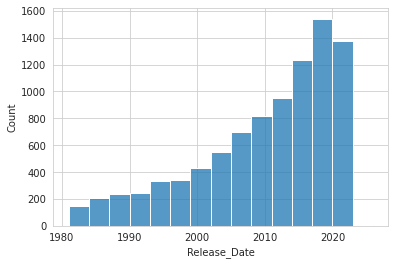

In [21]:
sns.set_style('whitegrid') 
s =sns.histplot(data= df, x= "Release_Date" , binwidth=3)


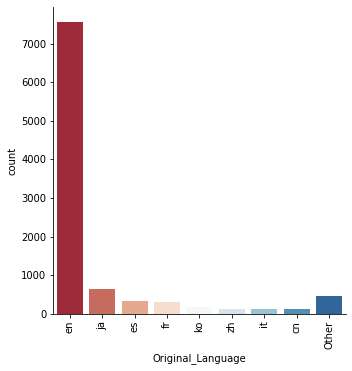

In [28]:
order = ["en","ja","es","fr","ko","zh","it", "cn", "Other"]
sns.catplot(data= df,
              x= "Original_Language" ,
              order = order,
            kind = "count",
            palette = "RdBu")
plt.xticks(rotation=90)
